In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 하기위해
warnings.filterwarnings("ignore", category=integrate.IntegrationWarning)

%matplotlib inline
%precision 3

'%.3f'

In [2]:
x_range = [0,2]
y_range = [0,1]

In [3]:
def f_xy(x,y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4*y*(x-y)
    else:
        return 0

In [4]:
XY = [x_range,y_range, f_xy]

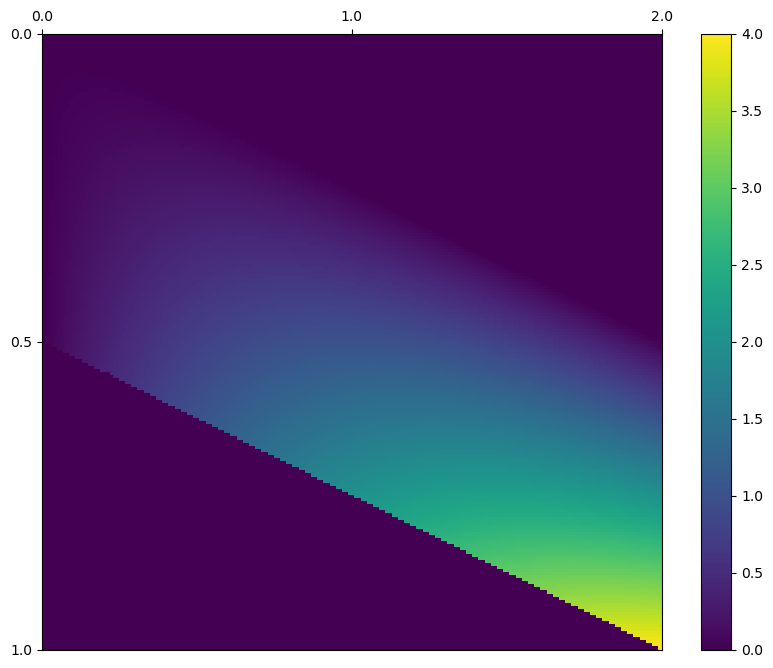

In [11]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x,y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c=ax.pcolor(pd)
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
ax.set_xticklabels(np.linspace(0,2,3))
ax.set_yticklabels(np.linspace(0,1,3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

함수 x와 y의 두 변수로 적분해야 하기 때문에 integrate.quad는 사용할수 없음
다중적분에는 integrate.nquad를 사용

In [14]:
# 첫 번째 인수는 피적분함수, 두 번째 인수는 x의 적분구간과 y의 적분구간
integrate.nquad(f_xy, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

1.000

In [15]:
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

In [16]:
X = [x_range, f_X]
Y = [y_range, f_Y]

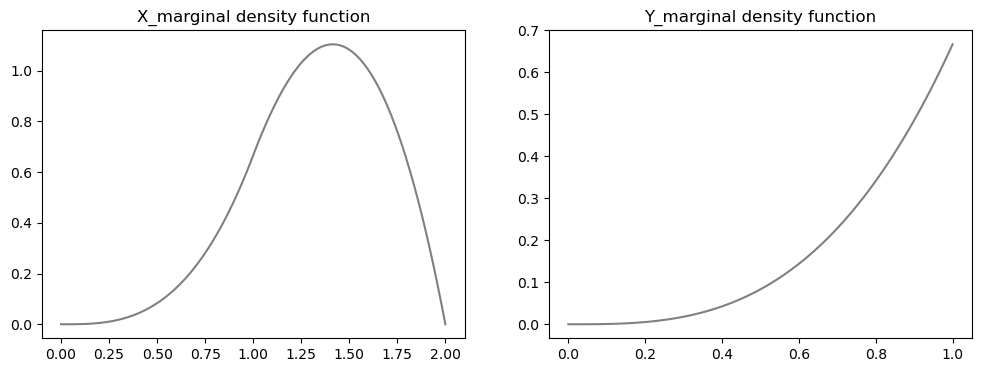

In [17]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_X(y) for y in ys], color='gray')
ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

기댓값

In [18]:
def integrand(x,y):
    return x * f_xy(x,y)

integrate.nquad(integrand,
                [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

1.333

기댓값의 함수로 구현하기

In [19]:
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x,y):
        return g(x,y) * f_xy(x,y)
    
    return integrate.nquad(integrand,
                           [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

In [20]:
mean_X = E(XY, lambda x, y: x)
mean_X

1.333

In [22]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

0.667

E(2X+3Y) = 2E(X) + 3E(Y) 를 확인

In [23]:
a, b =2, 3

In [24]:
E(XY, lambda x, y: a*x + b*y)

4.667

In [25]:
a*mean_X + b*mean_Y

4.667

분산 구하기

In [26]:
def integrand(x,y):
    return (x-mean_X)**2 * f_xy(x,y)

integrate.nquad(integrand,
                [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

0.111

In [27]:
def V(XY, g):
    x_range, y_range, f_x = XY
    mean = E(XY, g)
    def integrand(x,y):
        return (g(x,y) - mean)**2 * f_xy(x,y)
    
    return integrate.nquad(integrand,
                           [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

In [28]:
var_X = V(XY, lambda x, y:x)
var_X

0.111

In [29]:
var_Y = V(XY, lambda x, y:y)
var_Y

0.056

공분산

In [30]:
def Cov(XY):
    x_range, y_range, f_x = XY
    mean_X = E(XY, lambda x, y:x)
    mean_Y = E(XY, lambda x, y:y)
    def integrand(x,y):
        return (x-mean_X)*(y-mean_Y)*f_xy(x,y)
    
    return integrate.nquad(integrand,
                           [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

In [31]:
cov_xy = Cov(XY)
cov_xy

0.056

In [32]:
V(XY, lambda x,y :a*x + b*y)

1.611

In [33]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

1.611

상관계수

In [34]:
cov_xy / np.sqrt(var_X * var_Y)

0.707